# import Dataset From Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile

In [4]:
filename = "/content/creditcardfraud.zip"

with ZipFile(filename , "r")as zip:
  zip.extractall()

  print("Done")

Done


# Importing Dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating A Data Frame

In [6]:
dataset = pd.read_csv("/content/creditcard.csv")

In [7]:
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
dataset.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
dataset['Class'].value_counts()

,count
Class,
0,284315
1,492


 # Separate features and target

In [10]:
X = dataset.iloc[:,:-1]
y = dataset['Class']

<ipython-input-11-6d48942ea821>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset["Class"], palette="viridis")


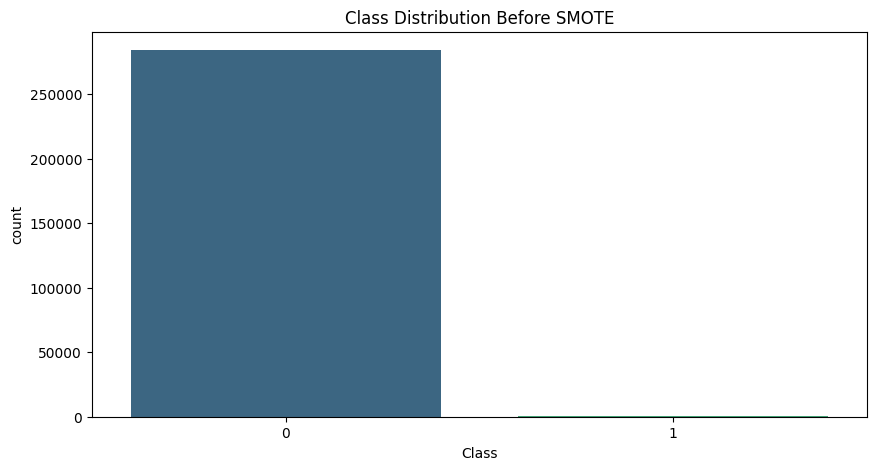

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataset["Class"], palette="viridis")
plt.title("Class Distribution Before SMOTE")
plt.show()

# Over-Sampling The Data

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(sampling_strategy='auto' , random_state=42)
X_resampled , y_resampled = smote.fit_resample(X,y)

<ipython-input-23-b4775b250034>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="viridis")


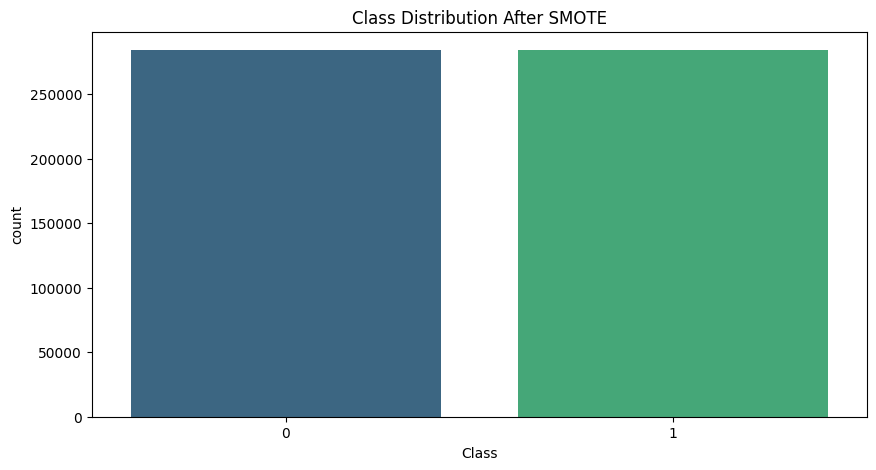

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.show()

# Visulizing The Data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


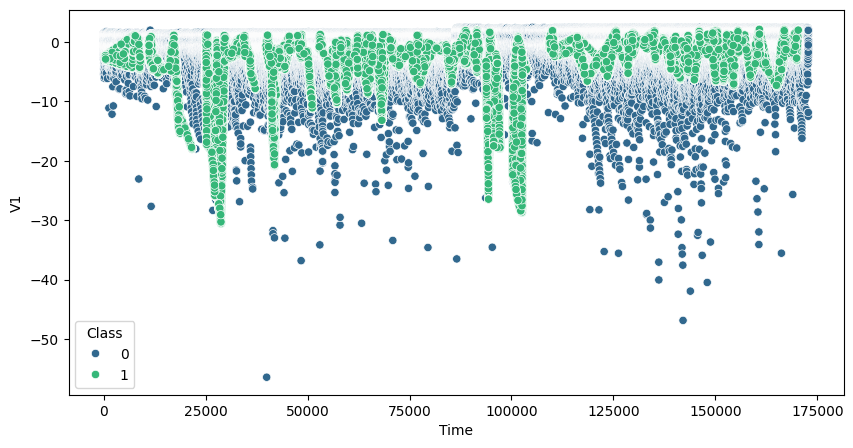

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_resampled.iloc[:,0] , y=X_resampled.iloc[:,1] , hue=y_resampled , palette="viridis")
plt.show()

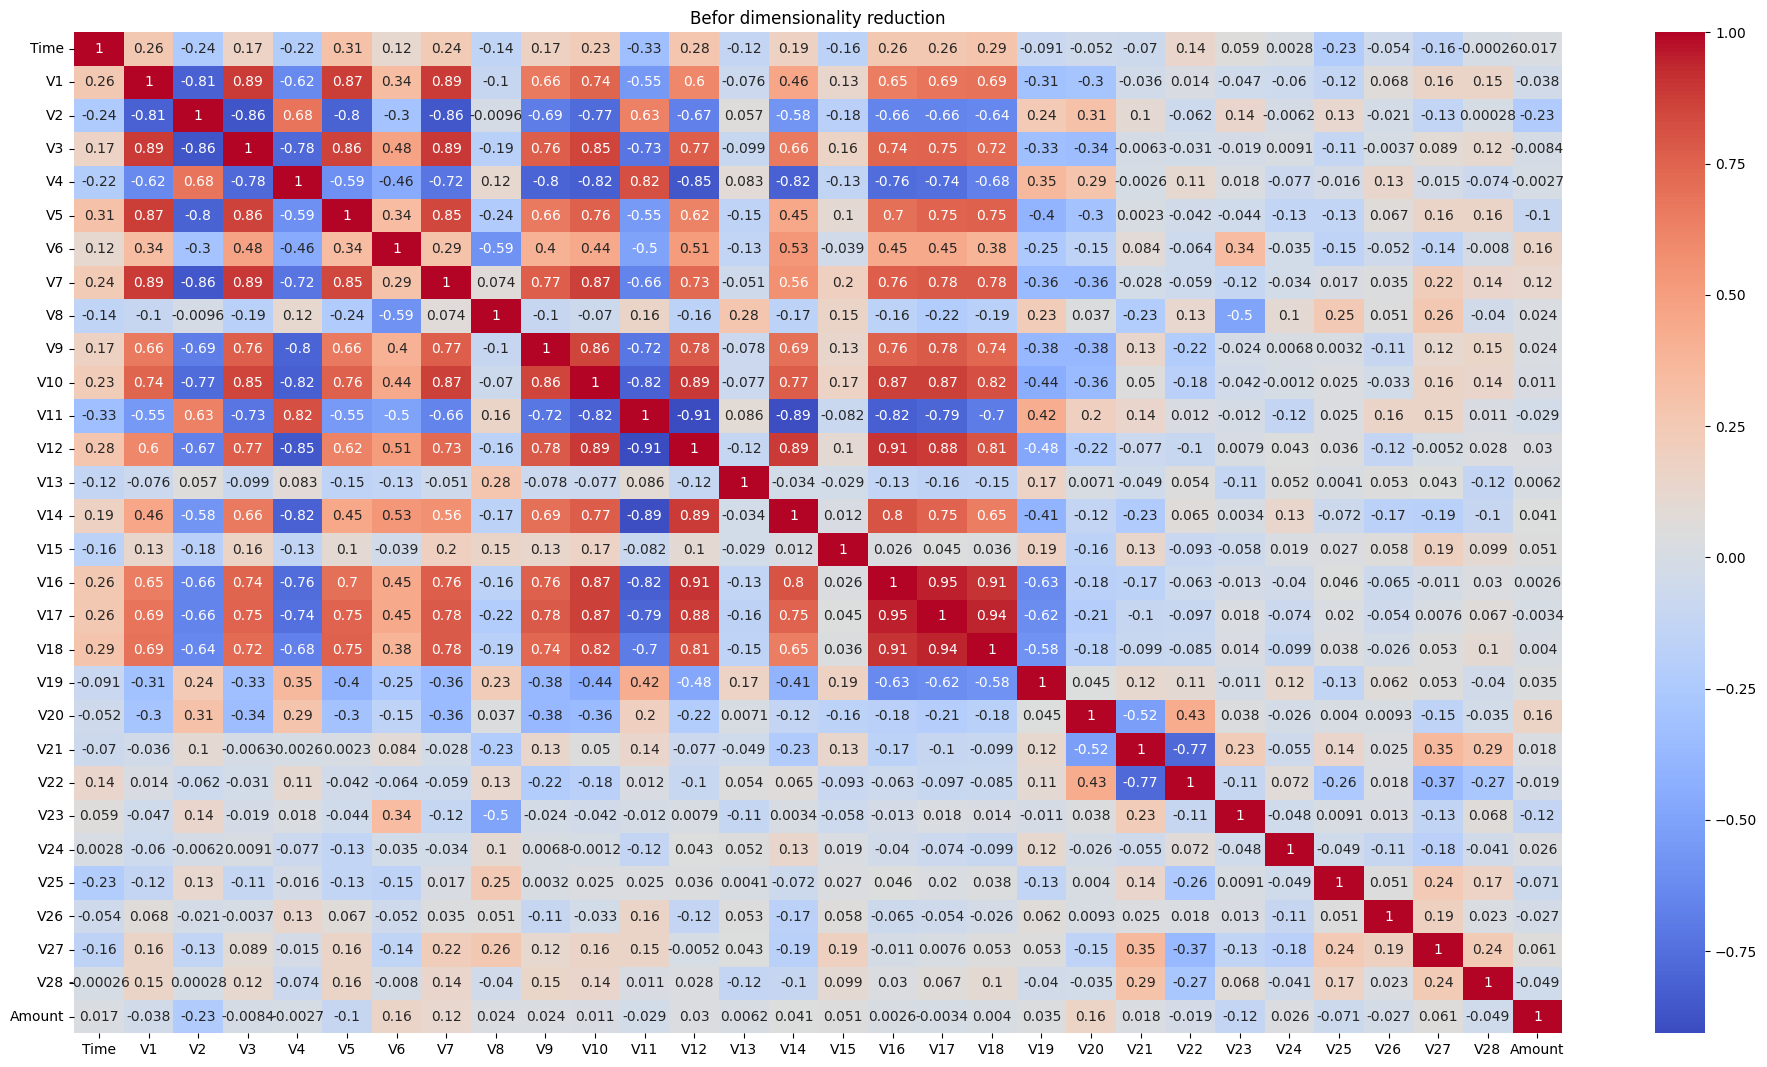

In [26]:
plt.figure(figsize=(24,13))
corr = X_resampled.corr()
sns.heatmap(corr , annot=True , cmap="coolwarm")
plt.title("Befor dimensionality reduction")
plt.show()

In [51]:
import math

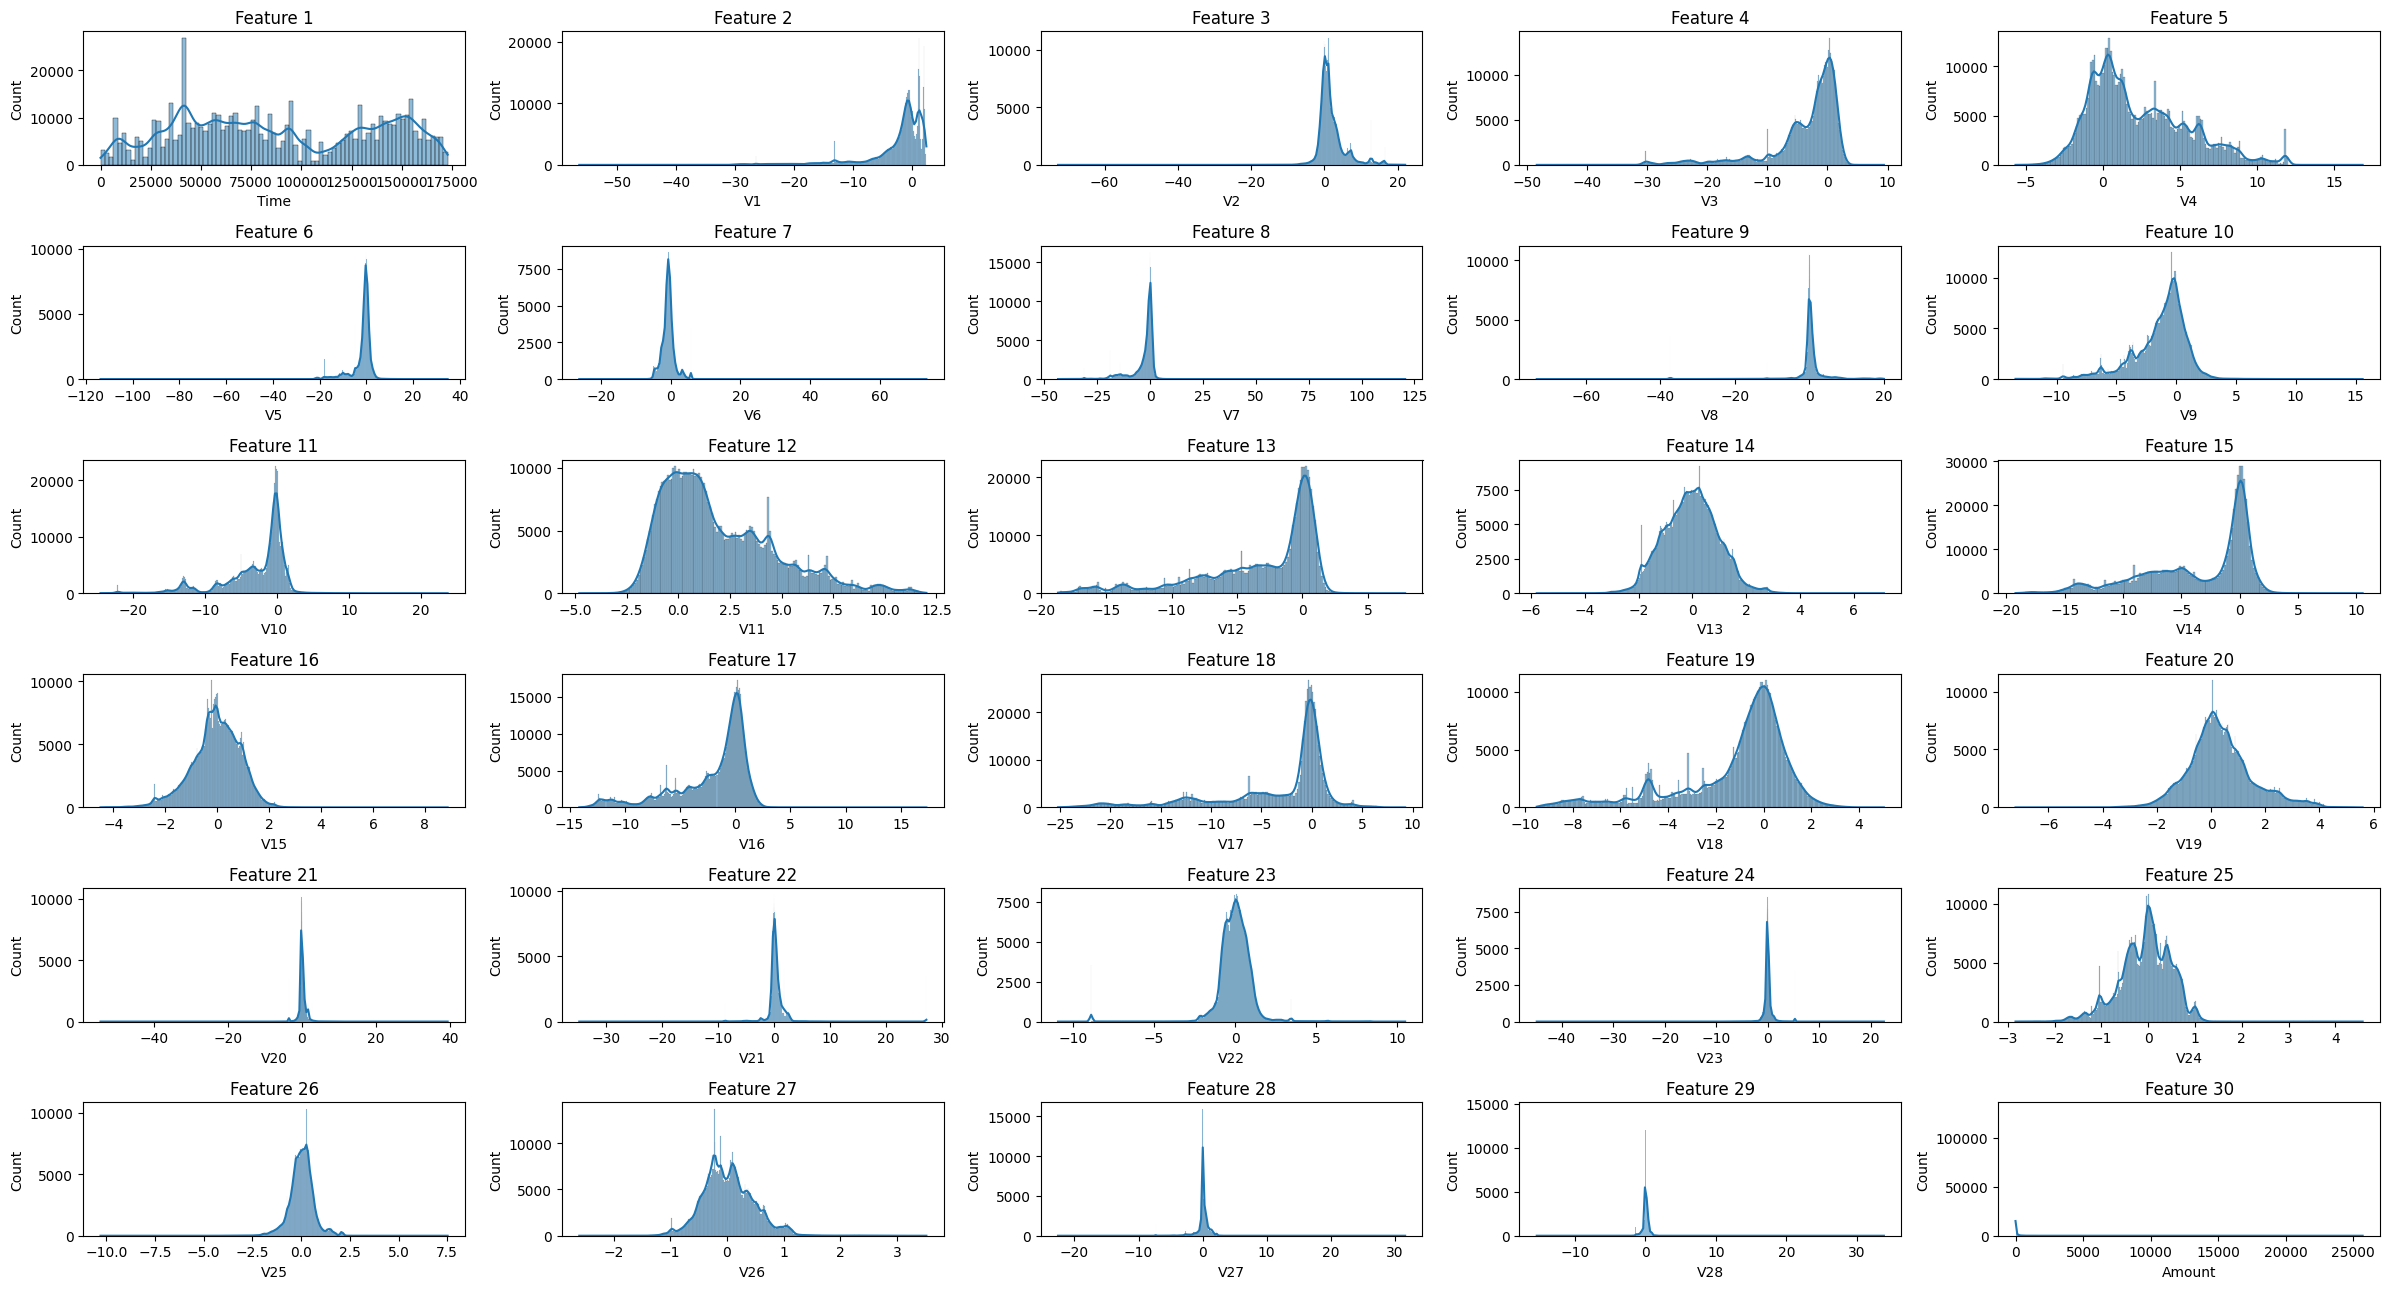

In [41]:

num_cols = X_resampled.shape[1]
num_rows = math.ceil(num_cols / 5)  # Calculate rows needed

plt.figure(figsize=(24, 13))

for i in range(num_cols):
    plt.subplot(num_rows, 5, i + 1)  # Use calculated num_rows
    sns.histplot(X_resampled.iloc[:, i], kde=True)
    plt.title(f"Feature {i + 1}")

plt.tight_layout()
plt.show()

# Feature Scaling The Data

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
X_scaled =  ss.fit_transform(X_resampled)

# Split The Data In Train Test

In [16]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y_resampled , test_size=0.2 , random_state=42)

# Create A Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [33]:
dt.score(X_train , y_train)*100 , dt.score(X_test , y_test) *100

(100.0, 99.87074195874295)

# Evaluate The Model

In [34]:
from sklearn.metrics import confusion_matrix , classification_report

In [36]:
X_pred = dt.predict(X_test)

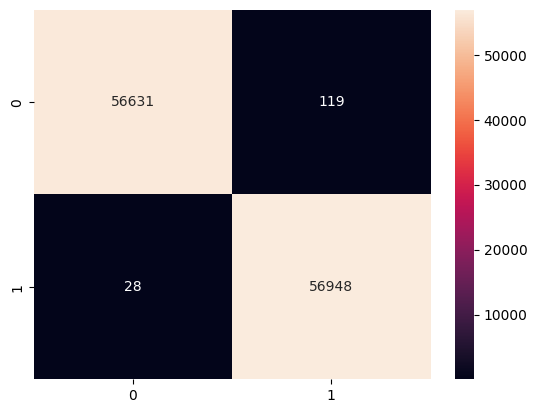

In [37]:
conf_matx = confusion_matrix(y_test , X_pred)

sns.heatmap(conf_matx , annot=True , fmt="d")
plt.show()

In [38]:
print(classification_report(y_test , X_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

